In [1]:
#import reuqired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./covid_merged_data.csv')


In [3]:
data.head()

,Unnamed: 0,patientid,offset,sex,age,finding,Covid-Detection,survival,intubated,intubation_present,...,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29,data_ref
0,0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,IEEE
1,1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,IEEE
2,2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,IEEE
3,3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,...,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,IEEE
4,4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,...,"Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN,IEEE


In [4]:
data.tail()

,Unnamed: 0,patientid,offset,sex,age,finding,Covid-Detection,survival,intubated,intubation_present,...,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29,data_ref
1680,94616,IM-0755,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,...,NaN,NaN,IM-0755-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
1681,94617,IM-0757,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,...,NaN,NaN,IM-0757-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
1682,94618,IM-0761,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,...,NaN,NaN,IM-0761-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
1683,94619,IM-0764,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,...,NaN,NaN,IM-0764-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle
1684,94620,IM-0766,NaN,Unknown,Unknown,NaN,NON-COVID,NaN,NaN,NaN,...,NaN,NaN,IM-0766-0001,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle


In [5]:
data.shape

(1685, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1685 non-null   int64  
 1   patientid               1685 non-null   object 
 2   offset                  660 non-null    float64
 3   sex                     1622 non-null   object 
 4   age                     1455 non-null   object 
 5   finding                 866 non-null    object 
 6   Covid-Detection         1328 non-null   object 
 7   survival                341 non-null    object 
 8   intubated               225 non-null    object 
 9   intubation_present      227 non-null    object 
 10  went_icu                388 non-null    object 
 11  in_icu                  326 non-null    object 
 12  needed_supplemental_O2  86 non-null     object 
 13  extubated               37 non-null     object 
 14  temperature             74 non-null     

In [7]:
data.describe()

,Unnamed: 0,offset,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,1685.000000,660.000000,74.000000,116.000000,15.000000,28.000000,40.000000
mean,29234.510979,9.092424,38.941892,78.255172,5.188000,5.307143,4.638050
std,43343.537812,32.479230,6.666909,39.170400,2.669077,3.489956,20.550033
min,0.000000,-360.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,227.000000,1.000000,37.725000,55.000000,3.140000,2.725000,0.746500
50%,624.000000,5.000000,38.200000,85.000000,5.500000,4.800000,1.100000
75%,94199.000000,10.000000,39.000000,95.000000,6.875000,6.925000,1.600000
max,94620.000000,365.000000,95.000000,340.000000,11.200000,12.900000,131.000000


In [8]:
# creating a copy of the dataset
data1=data

In [9]:
# character and numeric variable count
num=data.select_dtypes(include=['int64','float64']).columns
char=data.select_dtypes(include=['object']).columns
print("Numeric variables:",len(num))
print('Character variables:',len(char))

Numeric variables: 7
Character variables: 25


In [10]:
print('Column name of numeric variables')
print(num)
print('*********************************')
print('Column name of character variables')
print(char)

Column name of numeric variables
Index(['Unnamed: 0', 'offset', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count'],
      dtype='object')
*********************************
Column name of character variables
Index(['patientid', 'sex', 'age', 'finding', 'Covid-Detection', 'survival',
       'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'view', 'modality', 'date',
       'location', 'folder', 'filename', 'doi', 'url', 'license',
       'clinical_notes', 'other_notes', 'Unnamed: 29', 'data_ref'],
      dtype='object')


## Missing values

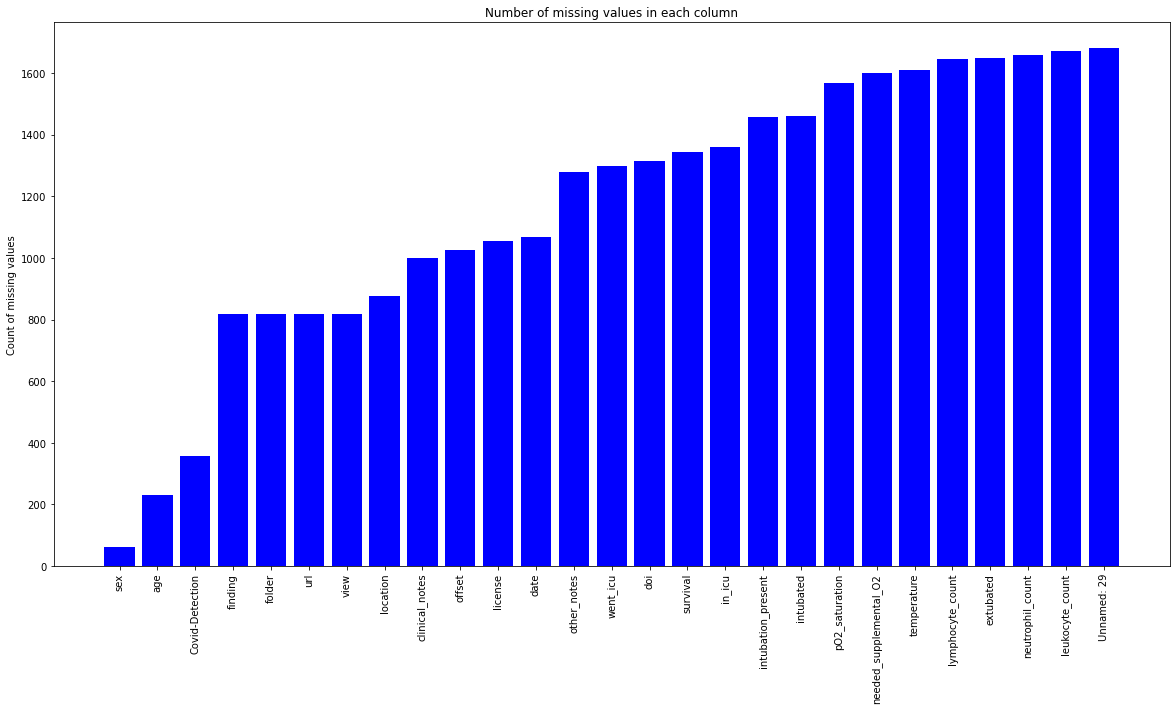

In [11]:
import matplotlib.pyplot as plt
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(20,10))
rects = ax.bar(ind, missing_df.missing_count.values, color='blue')
ax.set_xticks(ind)
ax.set_xticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_ylabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.xticks(rotation=90)
plt.show()

## Analyzing Covid-Detection

In [12]:
data['Covid-Detection'].value_counts()

NON-COVID    532
Y            315
COVID-19     287
Unclear      194
Name: Covid-Detection, dtype: int64

In [13]:
data['Covid-Detection'].isna().sum()

357

### Converting y=which means having covid into COVID-19

In [14]:
data['Covid-Detection'].replace('Y','COVID-19', inplace=True)

In [15]:
data['Covid-Detection'].value_counts()

COVID-19     602
NON-COVID    532
Unclear      194
Name: Covid-Detection, dtype: int64

### Graph for covid-detection

In [16]:
data['Covid-Detection'].replace('NON-COVID','Normal',inplace=True)

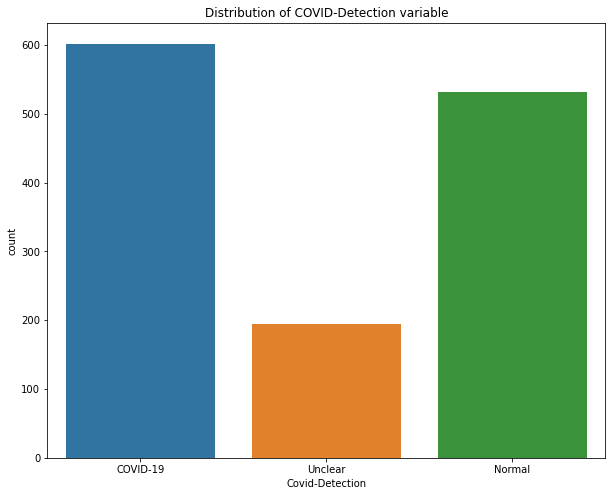

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Covid-Detection', data = data)
plt.title('Distribution of COVID-Detection variable')
# Show the plot
plt.show()

## Anlayzing Age

* Since age is given as object we will analyze and convert it into numeric

* Out of 2504 rows, 1192 rows has age = Unkown and 230 rows has NAN values, so we are left with 1082 rows that has age defined. 

* We will try to impute with the mode and see the if we get better performing model


In [18]:
data['age'].value_counts()

Unknown    596
50.0        53
70.0        50
55.0        42
30.0        39
          ... 
37.0         2
88.0         2
94.0         2
82.0         2
87.0         2
Name: age, Length: 69, dtype: int64

In [19]:
data['age'].isna().sum()

230

In [20]:
data[data['age']=='Unknown']=None

In [21]:
data['age'] = data['age'].astype(float, errors = 'raise')

In [22]:
data['age'].value_counts()

50.0    53
70.0    50
55.0    42
30.0    39
45.0    38
        ..
90.0     2
37.0     2
41.0     2
57.0     2
82.0     2
Name: age, Length: 68, dtype: int64

### Graph for Age

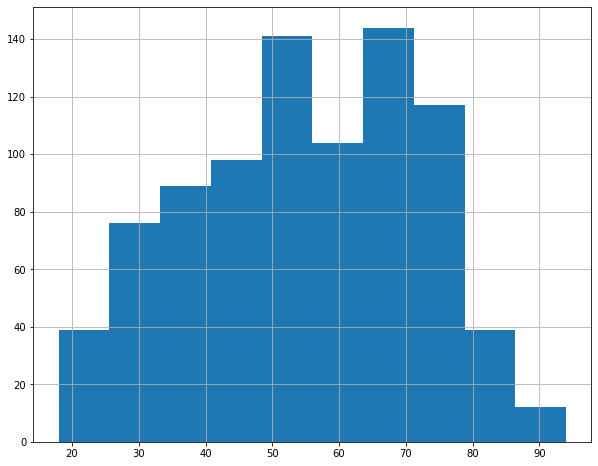

In [23]:
age_hist=data['age'].hist(figsize=(10,8))

### Categorizing the age in groups

In [24]:
print(data['age'].min())
print(data['age'].max())
print(data['age'].median())
print(data['age'].mean())


18.0
94.0
55.0
55.046565774155994


In [25]:
bins= [0,40,60,100]
labels = ['Young','Mid-Aged','Old-Aged']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


### Graph for Age after grouping

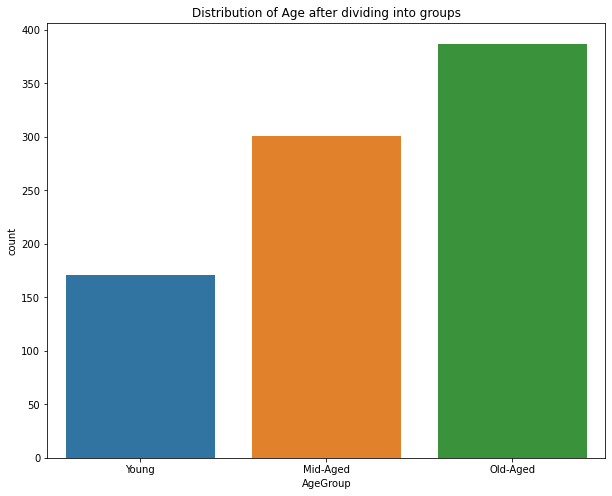

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x ='AgeGroup', data = data)
plt.title('Distribution of Age after dividing into groups')
# Show the plot
plt.show()

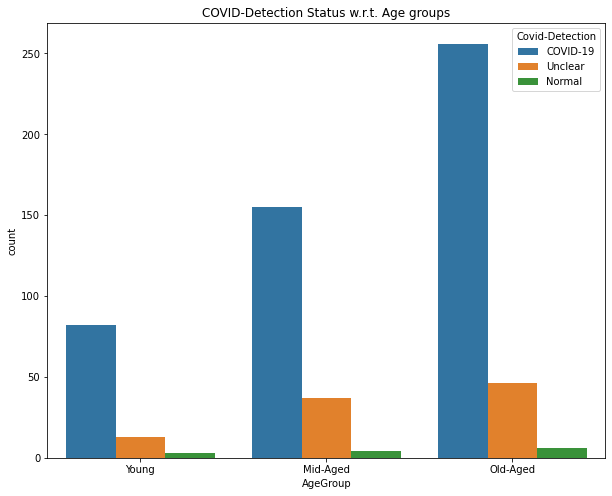

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x ='AgeGroup', data = data,hue='Covid-Detection')
plt.title('COVID-Detection Status w.r.t. Age groups')
# Show the plot
plt.show()

In [60]:
group=data.groupby('AgeGroup','Covid-Detection')


ValueError: No axis named Covid-Detection for object type DataFrame

In [27]:
# character and numeric variable count
num=data.select_dtypes(include=['int64','float64']).columns
char=data.select_dtypes(include=['object']).columns
print("Numeric variables:",len(num))
print('Character variables:',len(char))

Numeric variables: 8
Character variables: 24


## Analyzing Sex

* Since the sex is given as object, we will be doing one-hot encoding on age
* Out 2504 rows, sex of 1102 are Unknown and 63 of them have NAN values


In [28]:
data['sex'].value_counts()

M          654
F          363
Unknown      9
Name: sex, dtype: int64

In [29]:
data['sex'].isna().sum()

659

In [30]:
len(data[data['sex']=='F'])

363

In [31]:
data['sex'].replace(['M', 'F'], ['Male', 'Female'], inplace=True)

### Graph for Sex

Male       654
Female     363
Unknown      9
Name: sex, dtype: int64


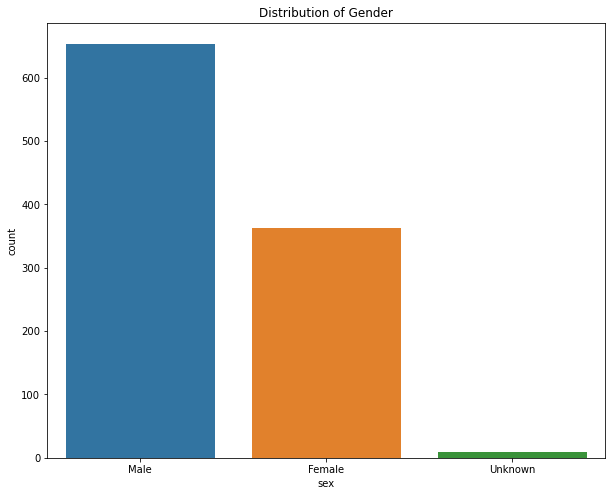

In [32]:
print(data['sex'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='sex', data = data)
plt.title("Distribution of Gender")
# Show the plot
plt.show()

## Graph to see how covid distribution in male and female

Male       654
Female     363
Unknown      9
Name: sex, dtype: int64


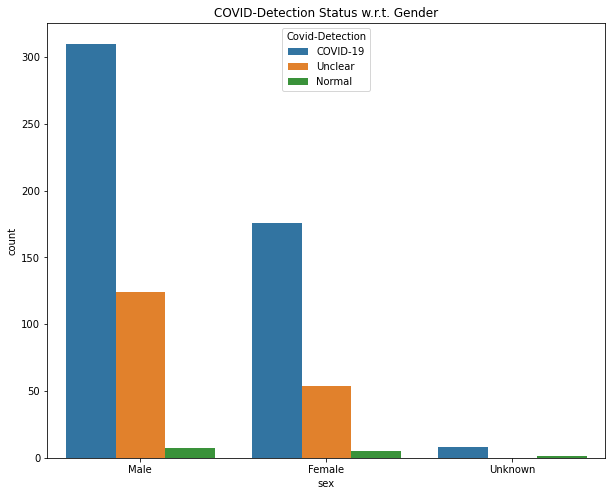

In [33]:
print(data['sex'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='sex', data = data,hue='Covid-Detection')
plt.title("COVID-Detection Status w.r.t. Gender")
# Show the plot
plt.show()

In [34]:
data['sex'].replace(['Unknown','M', 'F'], [2,1,0], inplace=True)

In [35]:
len(data[data['sex']==0])

0

# EDA for remaining variables

### Graph for went_icu

In [61]:
print(data['went_icu'].isna().sum())


1297


Y    277
N    111
Name: went_icu, dtype: int64


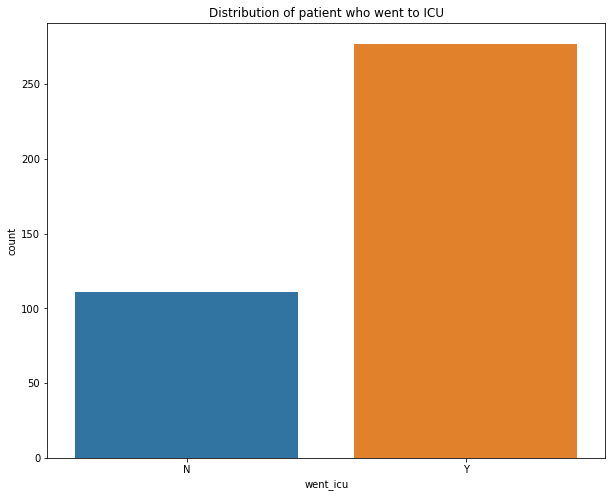

In [36]:
print(data['went_icu'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='went_icu', data = data)
plt.title('Distribution of patient who went to ICU')
# Show the plot
plt.show()

### Graph for survival

In [64]:
print(data['survival'].isna().sum())


1344


Y    265
N     76
Name: survival, dtype: int64


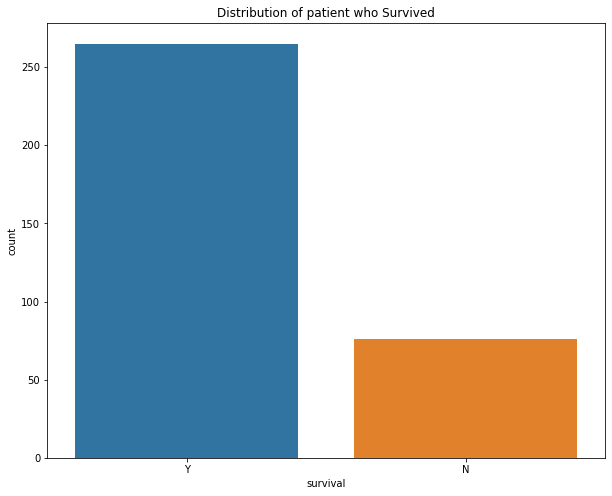

In [37]:
print(data['survival'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='survival', data = data)
plt.title('Distribution of patient who Survived')
 
# Show the plot
plt.show()

Y    265
N     76
Name: survival, dtype: int64


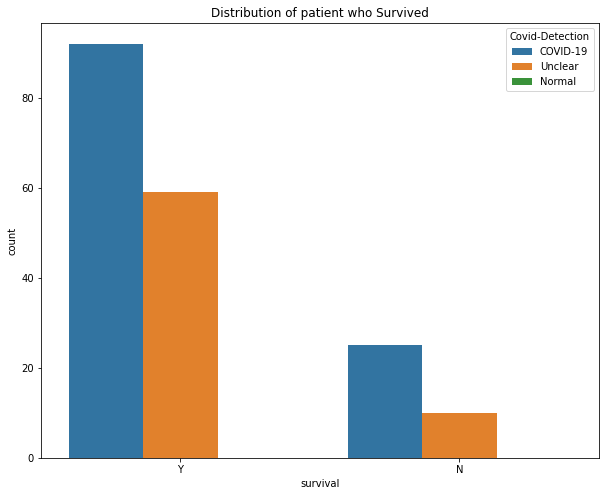

In [65]:
print(data['survival'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='survival', data = data,hue='Covid-Detection')
plt.title('Distribution of patient who Survived')
 
# Show the plot
plt.show()

### Graph for survival

Y    265
N     76
Name: survival, dtype: int64


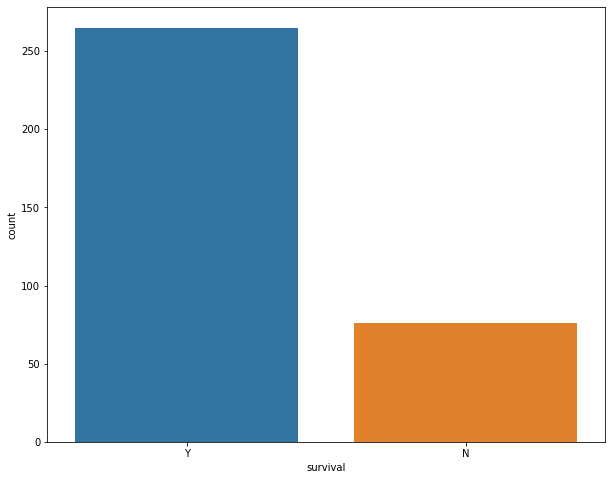

In [38]:
print(data['survival'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='survival', data = data)
 
# Show the plot
plt.show()

Y    265
N     76
Name: survival, dtype: int64


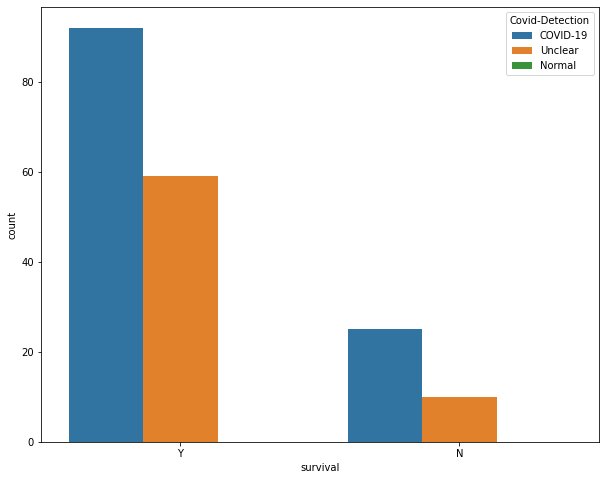

In [66]:
print(data['survival'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='survival', data = data,hue='Covid-Detection')
 
# Show the plot
plt.show()

### Graph for view



PA           344
AP Supine    234
AP           203
L             84
AP Erect       1
Name: view, dtype: int64


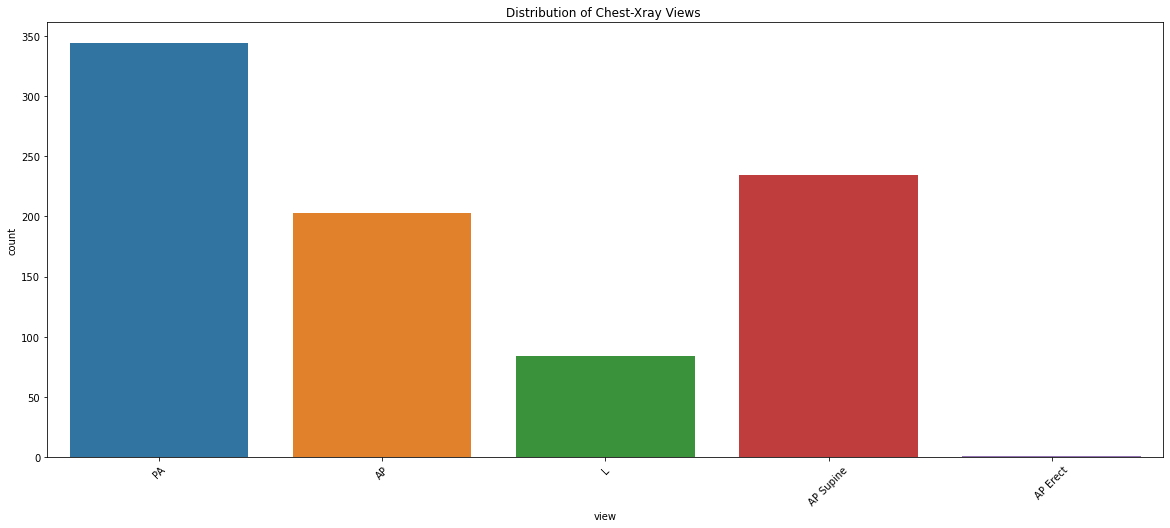

In [39]:
print(data['view'].value_counts())
plt.figure(figsize=(20,8))
sns.countplot(x ='view', data = data)
plt.xticks(rotation=45) 
plt.title('Distribution of Chest-Xray Views ')

# Show the plot
plt.show()

In [40]:
data['view'].replace(['AP Supine','AP Erect'], ['AP','AP'], inplace=True)

In [63]:
data['view'].isna().sum()

819

AP    438
PA    344
L      84
Name: view, dtype: int64


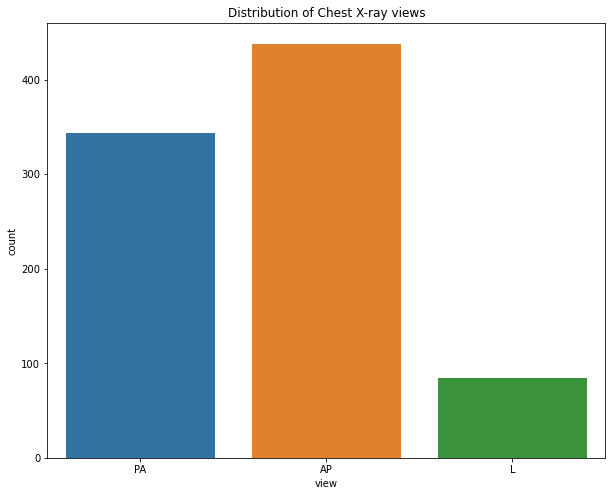

In [41]:
print(data['view'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='view', data = data)
plt.title('Distribution of Chest X-ray views')

# Show the plot
plt.show()

AP    438
PA    344
L      84
Name: view, dtype: int64


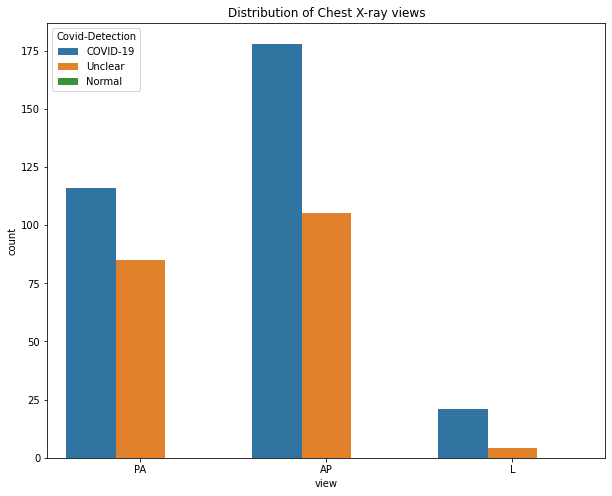

In [67]:
print(data['view'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='view', data = data,hue='Covid-Detection')
plt.title('Distribution of Chest X-ray views')

# Show the plot
plt.show()

### Graph for intubated

* The primary purposes of intubation include: opening up the airway to give oxygen, anesthetic, or medicine. removing blockages. helping a person breathe if they have collapsed lungs, heart failure, or trauma.

In [62]:
print(data['intubated'].isna().sum())


1460


Y    130
N     95
Name: intubated, dtype: int64


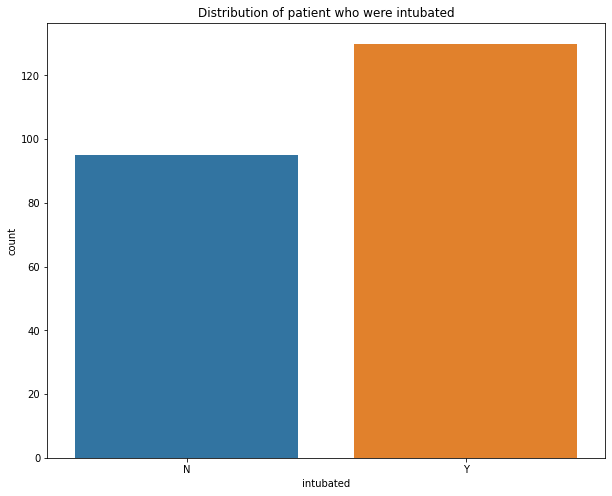

In [42]:
print(data['intubated'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x ='intubated', data = data)
plt.title('Distribution of patient who were intubated')
 
# Show the plot
plt.show()

### Analyzing temperature

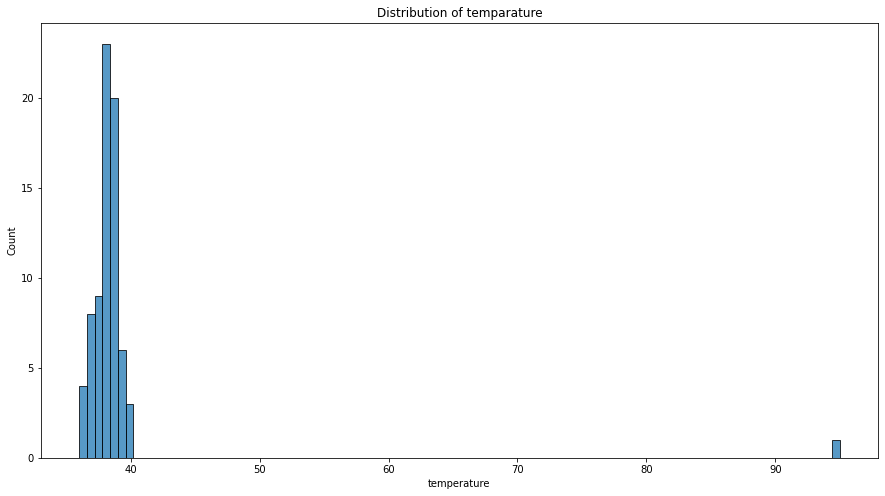

In [43]:
plt.figure(figsize=(15,8))
sns.histplot(data=data, x="temperature")
plt.title('Distribution of temparature')

plt.show()

### Analyze Clinical notes

* Try to analyze clinical notes & we will see if we can do some NLP text mining
* There are 1000 clinical notes given

In [44]:
data['clinical_notes'][0]

'On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. Chest radiographs obtained on admission showed an infiltrate in the upper lobe of the left lung'

### Analyze finding

In [45]:
data['finding'].value_counts()

Pneumonia/Viral/COVID-19                   504
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
Tuberculosis                                18
No Finding                                  18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Herpes                       3
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Vir